sdi0800018 Μιχάλης Δεικτάκης
sdi1800216 Ιωάννης Ψαρρός

In [ ]:
#Read from tsv
import pandas as pd
pd.__version__
# df=pd.read_csv('data.tsv', sep="\t")
df = pd.read_csv('data.csv', sep="," , nrows = 20000)


**ΑΣΚΗΣΗ 1 - PREPROCESSING DATA**

Αρχικά κάνουμε preprocess το dataframe


*   Αφαιρούμε τα links
*   Μετατρέπουμε τα text σε πεζά
*   Αφαιρούμε σημεία στίξης/hashtags/emoticons και τέλος τα stopwords

Τέλος αφαιρούμε τις γραμμές όπου το text είναι κενό




In [ ]:
#Preprocessing
#Remove Links
df["text"] = df["text"].str.replace(r's*https?://S+(s+|$)', ' ',regex=True).str.strip()
#To Lowercase
df = df.applymap(lambda s: s.lower() if type(s) == str else s)
#Remove Punctuation,hashtags,emoticons,emojis
df["text"]=df["text"].replace("[^\w\s]", "",regex=True)
#Remove Stopwords
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS

#drop rows without text

# df = df.replace(r'^s*$', float('NaN'), regex = True)
df.dropna(subset = ['text'], inplace = True)

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df.dropna(subset = ['text'], inplace = True)


**ΑΣΚΗΣΗ 2 - DATA ANALYSIS**

I) KATANOMH POSITIVE-NEUTRAL-NEGATIVE ΣΤΟ DATASET

<function matplotlib.pyplot.show>

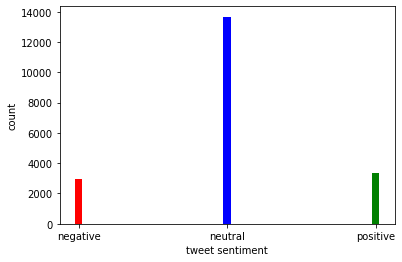

In [ ]:
#Graphs 1
#negative,neutral,positive distribution
import matplotlib.pyplot as plt
neg=0
neut=0
pos=0
for sentiment in df['sentiment']:
  if sentiment=='neg':
    neg=neg+1
  elif sentiment=='neu':
    neut=neut+1
  else:
    pos=pos+1

left=[0,df['sentiment'].size/2,df['sentiment'].size]
height=[neg,neut,pos]
tick_label=['negative','neutral','positive']
plt.bar(left,height,tick_label=tick_label,width=500,color=['red','blue','green'])
plt.xlabel('tweet sentiment')
plt.ylabel('count')
plt.show


II) MOST COMMON WORDS ΣΕ ΟΛΟΚΛΗΡΟ ΤΟ DATASET

<function matplotlib.pyplot.show>

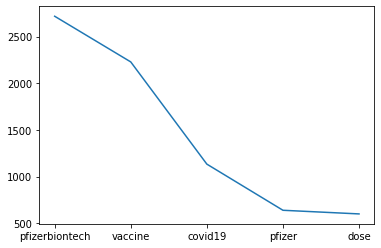

In [ ]:
#Graphs 2
#most common words
from collections import Counter
most_common=Counter(" ".join(df["text"]).split()).most_common(5)
word_count=[]
tick_labels=[]
for item in most_common:
  word_count.append(item[1])
  tick_labels.append(item[0])

plt.plot([1,2,3,4,5],word_count)
plt.xticks([1,2,3,4,5],tick_labels)
plt.show

III) MOST COMMON WORDS ΣΤΑ TWEETS ΑΝΑΛΟΓΑ ΜΕ ΤΟ SENTIMENT

<function matplotlib.pyplot.show>

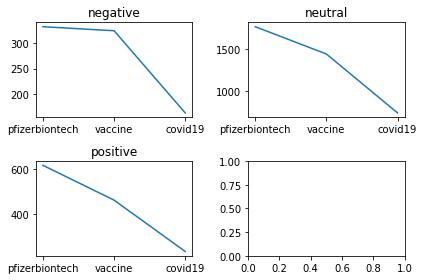

In [ ]:
#Graph3
#most common words by sentiment
neg_df=df.drop(df[df['sentiment']!='neg'].index)
neu_df=df.drop(df[df['sentiment']!='neu'].index)
pos_df=df.drop(df[df['sentiment']!='pos'].index)

figure, axis = plt.subplots(2, 2)

from collections import Counter
most_common=Counter(" ".join(neg_df["text"]).split()).most_common(3)
word_count=[]
tick_labels=[]
for item in most_common:
  word_count.append(item[1])
  tick_labels.append(item[0])

axis[0,0].plot([1,2,3],word_count)
axis[0,0].set_title('negative')
plt.sca(axis[0,0])
plt.xticks([1,2,3],tick_labels)


from collections import Counter
most_common=Counter(" ".join(neu_df["text"]).split()).most_common(3)
word_count=[]
tick_labels=[]
for item in most_common:
  word_count.append(item[1])
  tick_labels.append(item[0])

axis[0,1].plot([1,2,3],word_count)
axis[0,1].set_title('neutral')
plt.sca(axis[0,1])
plt.xticks([1,2,3],tick_labels)
from collections import Counter
most_common=Counter(" ".join(pos_df["text"]).split()).most_common(3)
word_count=[]
tick_labels=[]
for item in most_common:
  word_count.append(item[1])
  tick_labels.append(item[0])

axis[1,0].plot([1,2,3],word_count)
axis[1,0].set_title('positive')
plt.sca(axis[1,0])
plt.xticks([1,2,3],tick_labels)
plt.tight_layout()
plt.show


IV) ΠΟΣΟΣΤΑ ΕΜΦΑΝΙΣΗΣ ΣΥΝΑΙΣΘΗΜΑΤΩΝ ΓΙΑ ΤΑ ΔΙΑΦΟΡΕΤΙΚΑ ΕΜΒΟΛΙΑ

<function matplotlib.pyplot.show>

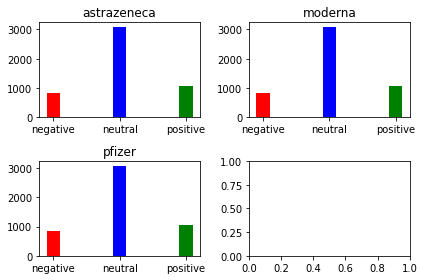

In [ ]:
#Graph4
#sentiment per vaccine word
astra_df=df[df['text'].str.contains("astrazeneca")]
figure, axis = plt.subplots(2, 2)

neg=0
neut=0
pos=0
for sentiment in df['sentiment']:
  if sentiment=='neg':
    neg=neg+1
  elif sentiment=='neu':
    neut=neut+1
  else:
    pos=pos+1

left=[0,df['sentiment'].size/2,df['sentiment'].size]
height=[neg,neut,pos]
tick_label=['negative','neutral','positive']
axis[0,0].bar(left,height,tick_label=tick_label,width=500,color=['red','blue','green'])
axis[0,0].set_title('astrazeneca')
moderna_df=df[df['text'].str.contains("moderna")]
neg=0
neut=0
pos=0
for sentiment in df['sentiment']:
  if sentiment=='neg':
    neg=neg+1
  elif sentiment=='neu':
    neut=neut+1
  else:
    pos=pos+1

left=[0,df['sentiment'].size/2,df['sentiment'].size]
height=[neg,neut,pos]
tick_label=['negative','neutral','positive']
axis[0,1].bar(left,height,tick_label=tick_label,width=500,color=['red','blue','green'])
axis[0,1].set_title('moderna')
pfizer_df=df[df['text'].str.contains("pfizer|biontech")]

neg=0
neut=0
pos=0
for sentiment in df['sentiment']:
  if sentiment=='neg':
    neg=neg+1
  elif sentiment=='neu':
    neut=neut+1
  else:
    pos=pos+1

left=[0,df['sentiment'].size/2,df['sentiment'].size]
height=[neg,neut,pos]
tick_label=['negative','neutral','positive']
axis[1,0].bar(left,height,tick_label=tick_label,width=500,color=['red','blue','green'])
axis[1,0].set_title('pfizer')
plt.tight_layout()
plt.show




ΕΝΑ WORD CLOUD ΠΟΥ ΔΕΙΧΝΕΙ ΚΥΡΙΩΣ ΤΙ ΛΕΞΕΙΣ ΠΟΥ ΕΜΦΑΝΙΖΟΝΤΑΙ ΣΥΧΝΟΤΕΡΑ ΣΤΑ TWEETS

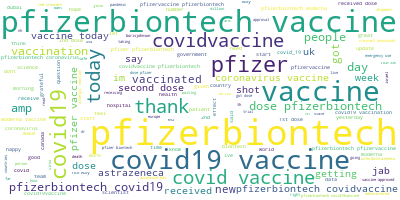

In [ ]:
#Graph most common words(diko mas)
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# train_df,test_df=train_test_split(df,test_size= 0.2 ,train_size=0.8)
# train_df.to_csv('train.tsv',sep="\t")
# test_df.to_csv('test.tsv',sep="\t")


SPLITING TO DATESET ΣΕ 10-FOLD CROSS VALITADION ΤΟ ΟΠΟΙΟ ΘΑ ΜΑΣ ΧΡΕΙΑΣΤΕΙ ΓΙΑ ΤΟ 4ο ΕΡΩΤΗΜΑ

In [ ]:
from sklearn.model_selection import KFold


# USING K-FOLD TO CREATE DIFFERENT SELECTIONS
kf = KFold(n_splits = 10, shuffle = True, random_state = 1)
result = list(kf.split(df))

train_df = []
test_df = []
for i in range(10):
  train_df.append(df.iloc[result[i][0]])
  test_df.append(df.iloc[result[i][1]])

**ΑΣΚΗΣΗ 3 - VECTORIZATION**

ΔΗΜΙΟΥΡΓΙΑ ΛΙΣΤΑΣ BOW/TFIDF/WORD EMBEDDINGS ΓΙΑ ΚΑΘΕ FOLD ΚΑΙ ΓΙΑ ΤΟ ΚΑΘΕ ΕΝΑ ΦΤΙΑΧΝΟΥΜΕ ΤΟ TRAIN ΚΑΙ TEST ARRAY ΑΝΤΙΣΤΟΙΧΑ


1)------Bag of Words------

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

bow_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=1000,
stop_words='english')

bow_xtrain = []
bow_xtest = []
# train and test arrays for BOW
for i in range(10):
  bow_xtrain.append(bow_vectorizer.fit_transform(train_df[i]["text"]))
  bow_xtest.append(bow_vectorizer.fit_transform(test_df[i]["text"]))


2) -------TF-IDF---------

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000,stop_words='english')

tfidf_train = []
tfidf_test = []

# train and test arrays for TF-IDF
for i in range(10):
  tfidf_train.append(tfidf_vectorizer.fit_transform(train_df[i]["text"]))
  tfidf_test.append(tfidf_vectorizer.fit_transform(test_df[i]["text"]))

3) ------- WORD EMBENDDINGS ----------

EΔΩ ΘΑ ΧΡΗΣΙΜΟΠΟΙΗΣΟΥΜΕ ΤΟ ΜΟΝΤΕΛΟ ΑΠΟ ΤΟ ΔΙΚΟ ΜΑΣ DATASET ΚΥΡΙΩΣ ΓΙΑΤΙ ΕΙΝΑΙ ΠΟΛΥ ΙΔΙΑΙΤΕΡΟ (ΣΧΕΤΙΚΟ ΜΕ COVID) ΚΑΙ ΤΑ ΕΤΟΙΜΑ MONTΕΛΑ ΧΑΝΟΥΝ ΑΡΚΕΤΕΣ ΣΧΕΤΙΚΕΣ ΛΕΞΕΙΣ

In [ ]:
import gensim
from gensim.models import Word2Vec , KeyedVectors

TWEETS = df["text"]

# training W2C model on our tweets

tokenized_tweet = TWEETS.apply(lambda x: x.split()) # tokenizing
model_w2v = gensim.models.Word2Vec(
 tokenized_tweet,
 size=300, # desired no. of features/independent variables
 window=5, # context window size
 min_count=2,
 sg = 1, # 1 for skip-gram model
 hs = 0,
 negative = 10, # for negative sampling
 workers= 2, # no.of cores
 seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(TWEETS), epochs=15)



(2307064, 3211170)

ΣΥΝΑΡΤΗΣΗ ΓΙΑ ΤΟ VECTORIZATION ΤΩΝ TWEETS

ΠΑΙΡΝΕΙ ΩΣ ΠΑΡΑΜΕΤΡΟΥΣ ΜΙΑ TOKENIZED ΠΡΟΤΑΣΗ ΚΑΙ ΤΟ ΜΟΝΤΕΛΟ ΚΑΙ ΕΠΙΣΤΡΕΦΕΙ ΕΝΑ VECTOR ΓΙΑ ΤΟ TWEET ΣΕ ΜΟΡΦΗ ARRAY



In [ ]:
# Function to vectorize a tweet
import numpy
def vectorize_tweet(tweet,model):
  # init tweet array to zeros
  tweet_vec = numpy.zeros(model.wv.vector_size)
  count = 0
  for word in tweet:
    try:
      # add the word vector for every word in the vocabulary
      tweet_vec += model.wv[word]
      count += 1
    except KeyError: # ignore if it's not in the vocabulary
      continue
      # divide by the number of words we added (still ignoring the ones we did not find)
  if count:
    tweet_vec /= count

  return tweet_vec

ΟΜΟΙΩΣ ΜΕ ΤΑ ΠΡΟΗΓΟΥΜΕΝΑ ΘΑ ΧΩΡΙΣΟΥΜΕ ΤΟ DATASET ΣΕ TRAIN ΚΑΙ TEST

In [ ]:
train_w2v = []
test_w2v = []

for i in range(10):
  # train dataframe 2 vectors
  tokenized_tweet = train_df[i]['text'].apply(lambda x: x.split())
  t2v = []
  for item in tokenized_tweet:
    t2v.append(vectorize_tweet(item,model_w2v))
  train_w2v.append(t2v)

  # test dataframe 2 vectors
  tokenized_tweet = test_df[i]['text'].apply(lambda x: x.split())
  t2v = []
  for item in tokenized_tweet:
    t2v.append(vectorize_tweet(item,model_w2v))
  test_w2v.append(t2v)

**ASKISI  4 - ΔΟΚΙΜΗ CLASSIFIERS**

### 1) SVM ###

----------------- RESULTS BOW --------------------

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score


clf = svm.SVC(gamma = 0.0001, C = 100)

precision = 0
accuracy = 0
recall = 0
f1 = 0

# fitting
for i in range(10):

  clf.fit(bow_xtrain[i],train_df[i]["sentiment"])

  prediction = clf.predict(bow_xtest[i])

  print(f'Itteration {i+1} of  10 - Fold')
  svm_bow_classification=classification_report(test_df[i]['sentiment'],prediction,output_dict=True)

  precision += svm_bow_classification["macro avg"]["precision"]
  recall += svm_bow_classification["macro avg"]["recall"]
  f1 += svm_bow_classification["macro avg"]["f1-score"]
  accuracy += svm_bow_classification["accuracy"]

precision /= 10
recall /= 10
f1 /= 10
accuracy /= 10


Itteration 1 of  10 - Fold
Itteration 2 of  10 - Fold
Itteration 3 of  10 - Fold
Itteration 4 of  10 - Fold
Itteration 5 of  10 - Fold
Itteration 6 of  10 - Fold
Itteration 7 of  10 - Fold
Itteration 8 of  10 - Fold
Itteration 9 of  10 - Fold
Itteration 10 of  10 - Fold


<function matplotlib.pyplot.show>

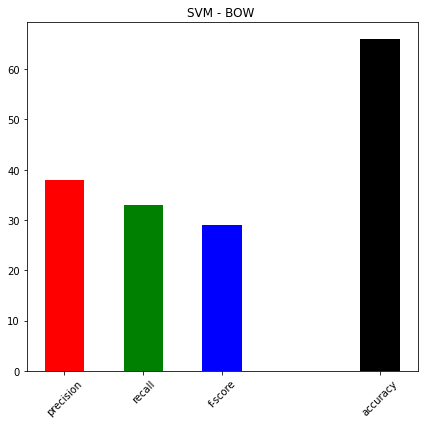

In [ ]:
plt.figure(figsize = (6,6))

left=[60,70,80,100]
height=[int(precision*100),int(recall*100),int(f1*100) ,int(accuracy*100)]
tick_label=['precision','recall','f-score','accuracy']
plt.bar(left,height,tick_label=tick_label,width=5,color = ["red","green","blue","black"])
plt.title('SVM - BOW ')
plt.xticks(rotation= 45)


plt.tight_layout()
plt.show

----------------- RESULTS TF-IDF --------------------



In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
import warnings
warnings.filterwarnings('ignore')
clf = svm.SVC(gamma = 0.0001, C = 100)

precision = 0
accuracy = 0
recall = 0
f1 = 0

# fitting
for i in range(10):
  clf.fit(tfidf_train[i], train_df[i]["sentiment"])


  prediction = clf.predict(tfidf_test[i])

  print(f'Itteration {i+1} of  10 - Fold')
  svm_tf_idf_classification = classification_report(test_df[i]['sentiment'],prediction,output_dict=True)

  precision += svm_tf_idf_classification["macro avg"]["precision"]
  recall += svm_tf_idf_classification["macro avg"]["recall"]
  f1 += svm_tf_idf_classification["macro avg"]["f1-score"]
  accuracy += svm_tf_idf_classification["accuracy"]

precision /= 10
recall /= 10
f1 /= 10
accuracy /= 10


<function matplotlib.pyplot.show>

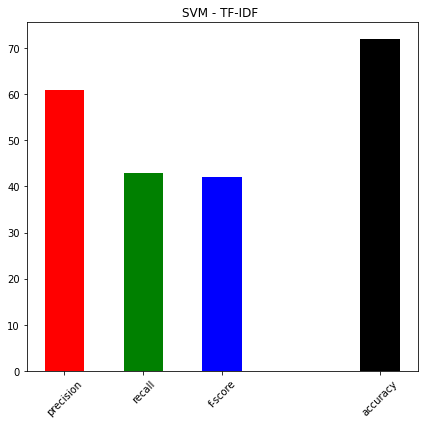

In [ ]:
plt.figure(figsize = (6,6))

left=[60,70,80,100]
height=[int(precision*100),int(recall*100),int(f1*100) ,int(accuracy*100)]
tick_label=['precision','recall','f-score','accuracy']
plt.bar(left,height,tick_label=tick_label,width=5,color = ["red","green","blue","black"])
plt.title('SVM - TF-IDF ')
plt.xticks(rotation= 45)


plt.tight_layout()
plt.show

-------- RESULTS WORD EMBEDDINGS ----------------------

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

clf = svm.SVC(gamma = 0.0001, C = 100)

precision = 0
accuracy = 0
recall = 0
f1 = 0

for i in range(10):

  clf.fit(train_w2v[i], train_df[i]["sentiment"])


  prediction = clf.predict(test_w2v[i])

  print(f'Itteration {i + 1} of 10 - Fold')
  svm_we_classification=classification_report(test_df[i]['sentiment'],prediction,output_dict=True)

  precision += svm_we_classification["macro avg"]["precision"]
  recall += svm_we_classification["macro avg"]["recall"]
  f1 += svm_we_classification["macro avg"]["f1-score"]
  accuracy += svm_we_classification["accuracy"]

precision /= 10
recall /= 10
f1 /= 10
accuracy /= 10

Itteration 1 of 10 - Fold
Itteration 2 of 10 - Fold
Itteration 3 of 10 - Fold
Itteration 4 of 10 - Fold
Itteration 5 of 10 - Fold
Itteration 6 of 10 - Fold
Itteration 7 of 10 - Fold


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Itteration 8 of 10 - Fold
Itteration 9 of 10 - Fold
Itteration 10 of 10 - Fold


<function matplotlib.pyplot.show>

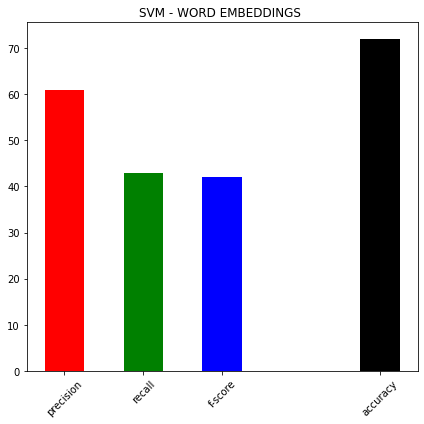

In [ ]:
plt.figure(figsize = (6,6))

left=[60,70,80,100]
height=[int(precision*100),int(recall*100),int(f1*100) ,int(accuracy*100)]
tick_label=['precision','recall','f-score','accuracy']
plt.bar(left,height,tick_label=tick_label,width=5,color = ["red","green","blue","black"])
plt.title('SVM - WORD EMBEDDINGS ')
plt.xticks(rotation= 45)


plt.tight_layout()
plt.show

# 2) RANDOM FOREST

----------------- RESULTS BOW --------------------

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
clf = RandomForestClassifier(n_estimators= 100 , random_state= 0)

precision = 0
accuracy = 0
recall = 0
f1 = 0

# fitting
for i in range(10):
  clf.fit(bow_xtrain[i],train_df[i]["sentiment"])


  prediction = clf.predict(bow_xtest[i])

  print(f'Itteration {i+1} of  10 - Fold')
  rf_bow_classification=classification_report(test_df[i]['sentiment'],prediction,output_dict=True)

  precision += rf_bow_classification["macro avg"]["precision"]
  recall += rf_bow_classification["macro avg"]["recall"]
  f1 += rf_bow_classification["macro avg"]["f1-score"]
  accuracy += rf_bow_classification["accuracy"]

precision /= 10
recall /= 10
f1 /= 10
accuracy /= 10


Itteration 1 of  10 - Fold
Itteration 2 of  10 - Fold
Itteration 3 of  10 - Fold
Itteration 4 of  10 - Fold
Itteration 5 of  10 - Fold
Itteration 6 of  10 - Fold
Itteration 7 of  10 - Fold
Itteration 8 of  10 - Fold
Itteration 9 of  10 - Fold
Itteration 10 of  10 - Fold


<function matplotlib.pyplot.show>

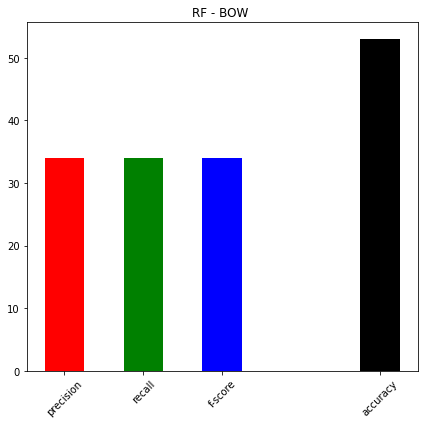

In [ ]:
plt.figure(figsize = (6,6))

left=[60,70,80,100]
height=[int(precision*100),int(recall*100),int(f1*100) ,int(accuracy*100)]
tick_label=['precision','recall','f-score','accuracy']
plt.bar(left,height,tick_label=tick_label,width=5,color = ["red","green","blue","black"])
plt.title('RF - BOW ')
plt.xticks(rotation= 45)


plt.tight_layout()
plt.show

----------------- RESULTS TF-IDF --------------------

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

clf = RandomForestClassifier(n_estimators= 100 , random_state= 0)

precision = 0
accuracy = 0
recall = 0
f1 = 0

# fitting
for i in range(10):
  clf.fit(tfidf_train[i], train_df[i]["sentiment"])


  prediction = clf.predict(tfidf_test[i])

  print(f'Itteration {i+1} of  10 - Fold')
  rf_tf_idf_classification = classification_report(test_df[i]['sentiment'],prediction,output_dict=True)

  precision += rf_tf_idf_classification["macro avg"]["precision"]
  recall += rf_tf_idf_classification["macro avg"]["recall"]
  f1 += rf_tf_idf_classification["macro avg"]["f1-score"]
  accuracy += rf_tf_idf_classification["accuracy"]

precision /= 10
recall /= 10
f1 /= 10
accuracy /= 10

Itteration 1 of  10 - Fold
Itteration 2 of  10 - Fold
Itteration 3 of  10 - Fold
Itteration 4 of  10 - Fold
Itteration 5 of  10 - Fold
Itteration 6 of  10 - Fold
Itteration 7 of  10 - Fold
Itteration 8 of  10 - Fold
Itteration 9 of  10 - Fold
Itteration 10 of  10 - Fold


<function matplotlib.pyplot.show>

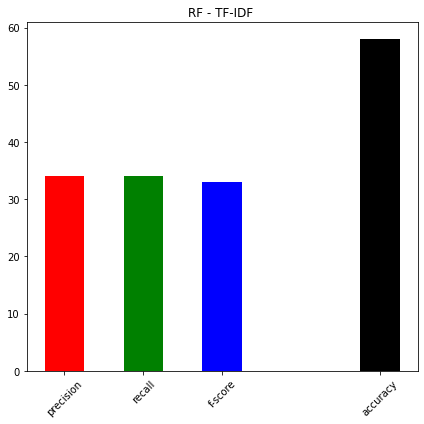

In [ ]:
plt.figure(figsize = (6,6))

left=[60,70,80,100]
height=[int(precision*100),int(recall*100),int(f1*100) ,int(accuracy*100)]
tick_label=['precision','recall','f-score','accuracy']
plt.bar(left,height,tick_label=tick_label,width=5,color = ["red","green","blue","black"])
plt.title('RF - TF-IDF ')
plt.xticks(rotation= 45)


plt.tight_layout()
plt.show

-------------- RESULTS WORD EMBEDDINGS --------------------

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

clf = RandomForestClassifier(n_estimators= 100 , random_state= 0)

precision = 0
accuracy = 0
recall = 0
f1 = 0


for i in range(10):

  clf.fit(train_w2v[i], train_df[i]["sentiment"])


  prediction = clf.predict(test_w2v[i])

  print(f'Itteration {i + 1} of 10 - Fold')

  rf_we_classification = classification_report(test_df[i]['sentiment'],prediction,output_dict=True)

  precision += rf_we_classification["macro avg"]["precision"]
  recall += rf_we_classification["macro avg"]["recall"]
  f1 += rf_we_classification["macro avg"]["f1-score"]
  accuracy += rf_we_classification["accuracy"]

precision /= 10
recall /= 10
f1 /= 10
accuracy /= 10

Itteration 1 of 10 - Fold
Itteration 2 of 10 - Fold
Itteration 3 of 10 - Fold
Itteration 4 of 10 - Fold
Itteration 5 of 10 - Fold
Itteration 6 of 10 - Fold
Itteration 7 of 10 - Fold
Itteration 8 of 10 - Fold
Itteration 9 of 10 - Fold
Itteration 10 of 10 - Fold


<function matplotlib.pyplot.show>

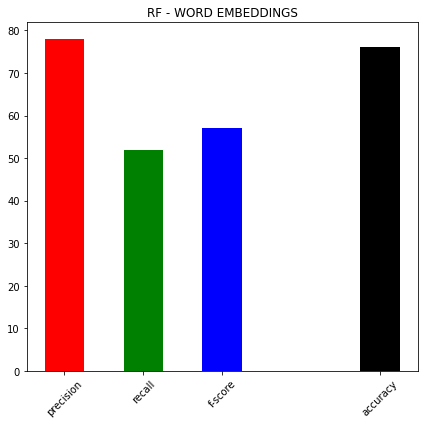

In [ ]:
plt.figure(figsize = (6,6))

left=[60,70,80,100]
height=[int(precision*100),int(recall*100),int(f1*100) ,int(accuracy*100)]
tick_label=['precision','recall','f-score','accuracy']
plt.bar(left,height,tick_label=tick_label,width=5,color = ["red","green","blue","black"])
plt.title('RF - WORD EMBEDDINGS')
plt.xticks(rotation= 45)


plt.tight_layout()
plt.show

3) KNN

--------- RESULTS BOW --------------------

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

clf = KNeighborsClassifier(3)

precision = 0
accuracy = 0
recall = 0
f1 = 0

for i in range(10):
  clf.fit(bow_xtrain[i],train_df[i]["sentiment"])


  prediction = clf.predict(bow_xtest[i])

  print(f'Itteration {i+1} of  10 - Fold')
  knn_bow_classification = classification_report(test_df[i]['sentiment'],prediction,output_dict=True)

  precision += knn_bow_classification["macro avg"]["precision"]
  recall += knn_bow_classification["macro avg"]["recall"]
  f1 += knn_bow_classification["macro avg"]["f1-score"]
  accuracy += knn_bow_classification["accuracy"]

precision /= 10
recall /= 10
f1 /= 10
accuracy /= 10

Itteration 1 of  10 - Fold
Itteration 2 of  10 - Fold
Itteration 3 of  10 - Fold
Itteration 4 of  10 - Fold
Itteration 5 of  10 - Fold
Itteration 6 of  10 - Fold
Itteration 7 of  10 - Fold
Itteration 8 of  10 - Fold
Itteration 9 of  10 - Fold
Itteration 10 of  10 - Fold


<function matplotlib.pyplot.show>

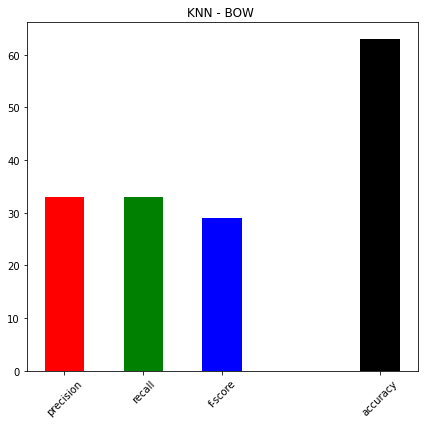

In [ ]:
plt.figure(figsize = (6,6))

left=[60,70,80,100]
height=[int(precision*100),int(recall*100),int(f1*100) ,int(accuracy*100)]
tick_label=['precision','recall','f-score','accuracy']
plt.bar(left,height,tick_label=tick_label,width=5,color = ["red","green","blue","black"])
plt.title('KNN - BOW ')
plt.xticks(rotation= 45)


plt.tight_layout()
plt.show

-------------- RESULTS TF-IDF ----------------

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

clf = KNeighborsClassifier()


precision = 0
accuracy = 0
recall = 0
f1 = 0

# fitting
for i in range(10):
  clf.fit(tfidf_train[i], train_df[i]["sentiment"])


  prediction = clf.predict(tfidf_test[i])

  print(f'Itteration {i+1} of  10 - Fold')

  # saving results to variables for plotting
  knn_tf_idf_classification = classification_report(test_df[i]['sentiment'],prediction,output_dict=True)


  precision += knn_tf_idf_classification["macro avg"]["precision"]
  recall += knn_tf_idf_classification["macro avg"]["recall"]
  f1 += knn_tf_idf_classification["macro avg"]["f1-score"]
  accuracy += knn_tf_idf_classification["accuracy"]

precision /= 10
recall /= 10
f1 /= 10
accuracy /= 10

Itteration 1 of  10 - Fold
Itteration 2 of  10 - Fold
Itteration 3 of  10 - Fold
Itteration 4 of  10 - Fold
Itteration 5 of  10 - Fold
Itteration 6 of  10 - Fold
Itteration 7 of  10 - Fold
Itteration 8 of  10 - Fold
Itteration 9 of  10 - Fold
Itteration 10 of  10 - Fold


<function matplotlib.pyplot.show>

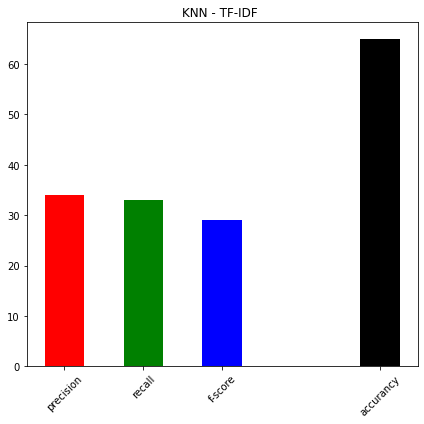

In [ ]:
plt.figure(figsize = (6,6))

left=[60,70,80,100]
height=[int(precision*100),int(recall*100),int(f1*100) ,int(accuracy*100)]
tick_label=['precision','recall','f-score','accurancy']
plt.bar(left,height,tick_label=tick_label,width=5,color = ["red","green","blue","black"])
plt.title('KNN - TF-IDF ')
plt.xticks(rotation= 45)


plt.tight_layout()
plt.show


---------------- RESULTS WORD EMBEDDINGS -----------------

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

clf = KNeighborsClassifier()

precision = 0
accuracy = 0
recall = 0
f1 = 0

for i in range(10):

  clf.fit(train_w2v[i], train_df[i]["sentiment"])


  prediction = clf.predict(test_w2v[i])

  print(f'Itteration {i + 1} of 10 - Fold')
  knn_we_classification = classification_report(test_df[i]['sentiment'],prediction,output_dict=True)
  precision += knn_we_classification["macro avg"]["precision"]
  recall += knn_we_classification["macro avg"]["recall"]
  f1 += knn_we_classification["macro avg"]["f1-score"]
  accuracy += knn_we_classification["accuracy"]

precision /= 10
recall /= 10
f1 /= 10
accuracy /= 10

Itteration 1 of 10 - Fold
Itteration 2 of 10 - Fold
Itteration 3 of 10 - Fold
Itteration 4 of 10 - Fold
Itteration 5 of 10 - Fold
Itteration 6 of 10 - Fold
Itteration 7 of 10 - Fold
Itteration 8 of 10 - Fold
Itteration 9 of 10 - Fold
Itteration 10 of 10 - Fold


<function matplotlib.pyplot.show>

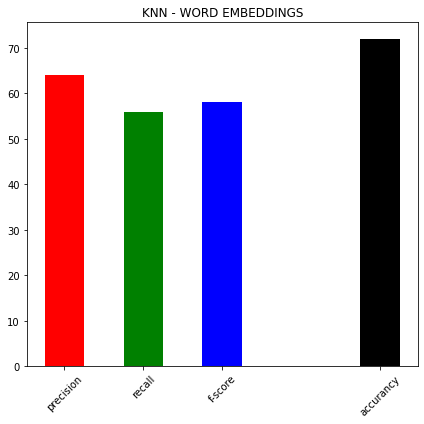

In [ ]:
plt.figure(figsize = (6,6))

left=[60,70,80,100]
height=[int(precision*100),int(recall*100),int(f1*100) ,int(accuracy*100)]
tick_label=['precision','recall','f-score','accurancy']
plt.bar(left,height,tick_label=tick_label,width=5,color = ["red","green","blue","black"])
plt.title('KNN - WORD EMBEDDINGS')
plt.xticks(rotation= 45)


plt.tight_layout()
plt.show


Όπως είναι λογικό βρίσκουμε ότι τα Word Embeddings δίνουν πολύ καλύτερα αποτελέσματα και με τους 3 αλγόριθμους με το accuracy να βρίσκεται περίπου στο 72 % και το f1-score που συνδυάζει precision και recall να βρίσκεται κατά μέσο όρο στο 48%. Ακολουθεί το Tf-idf με accuracy περίπου 65% και f1-score περίπου 32%. Τέλος τα BOW εμφανίζουν accuracy περίπου 62% με f1-score περίπου στο 30%.


Αναλογικά με τους αλγόριθμους βλέπουμε τον SVM και ΚΝΝ να φέρνουν κοντινά αποτελέσματα, ενώ ο Random Forests έχει λίγο χειρότερα αποτελέσματα και σε BOW και TF-IDF αλλά παρόμοια με τη χρήση WE.

Επίσης βλέπουμε πως ο KNN είναι πολύ ταχύτερος από τους άλλους δύο αλγορίθμους.


**ΑΣΚΗΣΗ 5 - ΜΟΝΤΕΛΟΠΟΙΗΣΗ ΘΕΜΑΤΩΝ LDA**

In [ ]:
#LDA

import warnings
warnings.filterwarnings('ignore')

import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]
data = df['text'].values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# NLTK Stop words
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
# Print the Keyword in the 10 topics
print("Printing Topics")
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['folks', 'said', 'daikon', 'paste', 'treat', 'cytokine', 'storm', 'pfizerbiontech', 'httpstcoxehhimg', 'kf']
[['folk', 'say', 'paste', 'treat', 'cytokine', 'storm', 'pfizerbiontech']]
Printing Topics
[(0,
  '0.107*"vaccine" + 0.062*"pfizerbiontech" + 0.043*"get" + 0.037*"covid" + '
  '0.021*"take" + 0.019*"develop" + 0.018*"scientist" + 0.018*"grateful" + '
  '0.016*"good" + 0.014*"thank"'),
 (1,
  '0.037*"think" + 0.028*"covidvaccine" + 0.027*"pfizerbiontech" + '
  '0.024*"want" + 0.019*"plan" + 0.016*"go" + 0.015*"medical" + 0.014*"death" '
  '+ 0.013*"bring" + 0.013*"amp"'),
 (2,
  '0.062*"today" + 0.043*"vaccinate" + 0.040*"vaccination" + 0.039*"thank" + '
  '0.026*"know" + 0.026*"new" + 0.022*"vaccine" + 0.019*"year" + 0.015*"get" + '
  '0.013*"good"'),
 (3,
  '0.038*"pfizerbiontech" + 0.038*"vaccine" + 0.037*"day" + 0.029*"shoot" + '
  '0.019*"pfizervaccine" + 0

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.167611  0.009750       1        1  12.879079
7     -0.127524  0.087857       2        1  12.282722
0     -0.106233 -0.103644       3        1  12.042828
5     -0.145435  0.075036       4        1  11.122424
3     -0.019115 -0.055299       5        1  10.357792
2      0.077654 -0.248518       6        1   9.660556
8     -0.009646  0.041995       7        1   8.754694
4      0.163121  0.132806       8        1   7.920921
6      0.174931  0.008580       9        1   7.493364
1      0.159859  0.051437      10        1   7.485621, topic_info=                Term        Freq       Total Category  logprob  loglift
17           vaccine  668.000000  668.000000  Default  30.0000  30.0000
4                say   82.000000   82.000000  Default  29.0000  29.0000
231             dose  139.000000  139.000000  Default  28.0000  28.0000
299            today   78.000000   78.000000  Default  27.0000  27.0000
3     pfizerbiontech  562.000000  562.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
44      covidvaccine   22.732232   38.677535  Topic10  -3.5669   2.0607
1293           right    7.984129   13.230207  Topic10  -4.6132   2.0871
3     pfizerbiontech   22.016012  562.656832  Topic10  -3.5989  -0.6487
135    pfizervaccine    7.042698   28.591041  Topic10  -4.7387   1.1911
500             good    5.401229   40.866259  Topic10  -5.0040   0.5685

[416 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
870       8  0.866083  absolutely
452       6  0.960483      accord
1356      1  0.952782         add
1160      7  0.945098  additional
166       1  0.801984  administer
...     ...       ...         ...
402      10  0.965901       would
14        5  0.456110        year
14        6  0.536600        year
2077      8  0.853059     yearold
612       7  0.959257   yesterday

[410 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 8, 1, 6, 4, 3, 9, 5, 7, 2])